In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Erinnerung: einfache lineare Regression

In [4]:
auto = pd.read_csv("ressources/auto.csv")
auto.head()

,name,Hubraum,Zylinder,Gewicht,Jahr,PS,Verbrauch
0,chevrolet chevelle malibu,5.03,8,1589.39,70,130.0,13.07
1,buick skylark 320,5.74,8,1675.12,70,165.0,15.68
2,plymouth satellite,5.21,8,1558.54,70,150.0,13.07
3,amc rebel sst,4.98,8,1557.18,70,150.0,14.70
4,ford torino,4.95,8,1564.44,70,140.0,13.84


Wir wollen den Verbrauch modellieren.

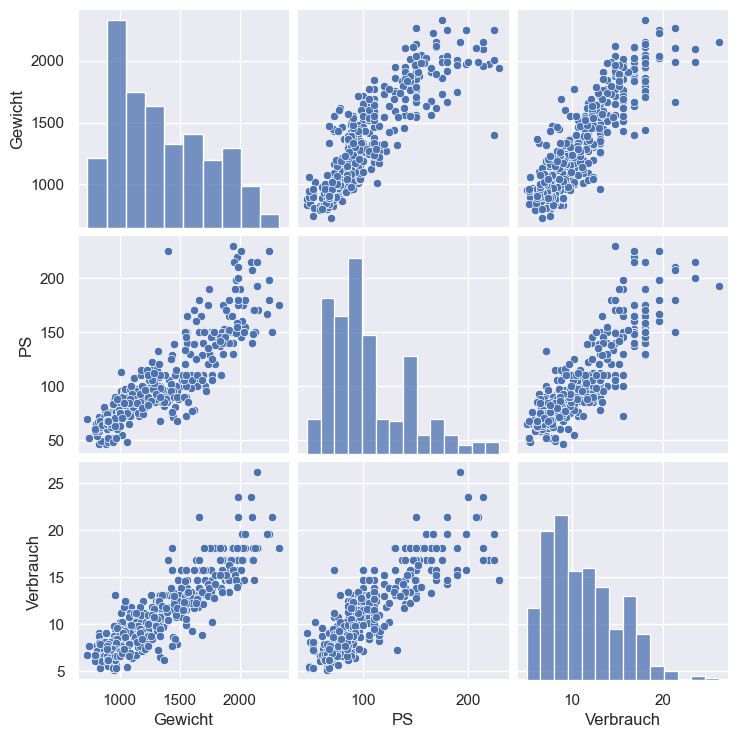

In [5]:
sns.set_theme()
sns.pairplot(data=auto[["Gewicht", "PS", "Verbrauch"]])
plt.show()

In [6]:
model = LinearRegression()
model.fit(X= auto[["Gewicht"]], y= auto["Verbrauch"])

print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)

# Modell zur Verbrauchsprognose anwenden:
auto["Verbrauch_pred"] = model.predict(auto[["Gewicht"]])
auto.head()

Slope:  [0.00898938]
Intercept:  -0.8927080038069661


,name,Hubraum,Zylinder,Gewicht,Jahr,PS,Verbrauch,Verbrauch_pred
0,chevrolet chevelle malibu,5.03,8,1589.39,70,130.0,13.07,13.394918
1,buick skylark 320,5.74,8,1675.12,70,165.0,15.68,14.165577
2,plymouth satellite,5.21,8,1558.54,70,150.0,13.07,13.117596
3,amc rebel sst,4.98,8,1557.18,70,150.0,14.70,13.105370
4,ford torino,4.95,8,1564.44,70,140.0,13.84,13.170633


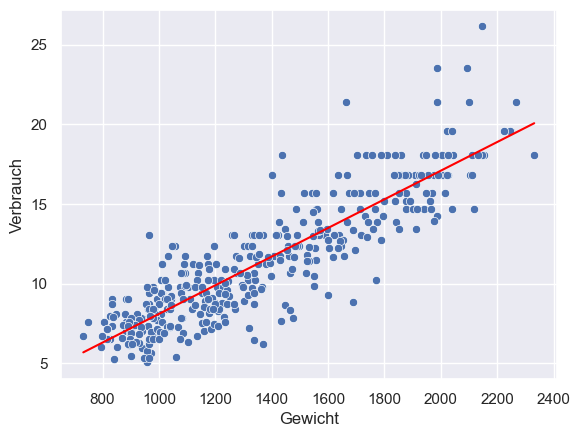

In [7]:
ax = sns.scatterplot(data=auto, x="Gewicht", y="Verbrauch")
sns.lineplot(ax=ax, x= auto["Gewicht"], y=auto["Verbrauch_pred"], color="red")
plt.show()

#### $R^2$ bestimmen

Zunächst klassisch per Definition: $R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$

In [8]:
RSS = np.sum((auto["Verbrauch"] - auto["Verbrauch_pred"])**2)

TSS = np.sum((auto["Verbrauch"] - auto["Verbrauch"].mean())**2)

R2 = 1 - RSS/TSS
R2

0.7832815756988708

Nun über die Methode `score()`. Jedes Modell in Scikit Learn implementiert diese Methode. Größere Werte sind immer besser. Die Funktion gibt für jedes Modell dessen typische Evaluationsgröße an. Für lineare Regression ist es das Bestimmtheitsmaß $R^2$. 

In [9]:
model.score(X= auto[["Gewicht"]], y= auto["Verbrauch"])

0.7832815756988709

### Alternatives Qualitätsmaß: mean squared error

$MSE=\frac{1}{n} \cdot \sum_{i=1}^n(y_i - f(x_i))^2$

In [10]:
np.mean((auto["Verbrauch"] - auto["Verbrauch_pred"])**2)

3.31043895744562

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=auto["Verbrauch"], y_pred=auto["Verbrauch_pred"])

3.3104389574456192

### Mehrdimensionale Regression

Nun wollen wir zusätzlich zum **Gewicht** noch **PS** als erklärende Variable für den **Verbrauch** hinzunehmen.

In [12]:
model_mult = LinearRegression()
model_mult.fit(X= auto[["Gewicht", "PS"]], y= auto["Verbrauch"])

print("Slope: ", model_mult.coef_)
print("Intercept: ", model_mult.intercept_)

# Modell zur Verbrauchsprognose anwenden:
auto["Verbrauch_pred2"] = model_mult.predict(auto[["Gewicht", "PS"]])

print("R2: ", model_mult.score(X= auto[["Gewicht", "PS"]], y= auto["Verbrauch"]))
print("MSE: ", mean_squared_error(y_true=auto["Verbrauch"], y_pred=auto["Verbrauch_pred2"]))
auto.head()

Slope:  [0.00587258 0.03608626]
Intercept:  -0.45305180103819964
R2:  0.8151013083399457
MSE:  2.824382993859651


,name,Hubraum,Zylinder,Gewicht,Jahr,PS,Verbrauch,Verbrauch_pred,Verbrauch_pred2
0,chevrolet chevelle malibu,5.03,8,1589.39,70,130.0,13.07,13.394918,13.571989
1,buick skylark 320,5.74,8,1675.12,70,165.0,15.68,14.165577,15.338465
2,plymouth satellite,5.21,8,1558.54,70,150.0,13.07,13.117596,14.112545
3,amc rebel sst,4.98,8,1557.18,70,150.0,14.70,13.105370,14.104558
4,ford torino,4.95,8,1564.44,70,140.0,13.84,13.170633,13.786331


Man kann die Koeffizienten auch selbständig berechnen, denn wir wissen:
$\hat{\vec{\beta}} = (X^T X)^{-1} X^T \vec{y}$

Beachte: sofern man einen Intercept mitmodellieren möchte, muss $X$ eine Spalte mit Einsen enthalten.

In [13]:
auto["one"]=1
X = auto[["one", "Gewicht", "PS"]].values

y = auto["Verbrauch"].values

In [14]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([-0.4530518 ,  0.00587258,  0.03608626])

### Polynomiale Regression

In [15]:
x = np.array([-2, 1, 4, 7, 10])
y = np.array([10, 3, 1, 4, 7])

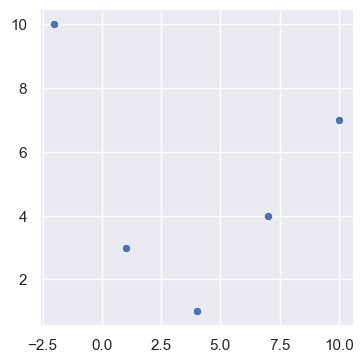

In [16]:
sns.relplot(x=x, y=y, height=4)
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

X_poly = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x.reshape(-1, 1))
X_poly

array([[  1.,  -2.,   4.],
       [  1.,   1.,   1.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.],
       [  1.,  10., 100.]])

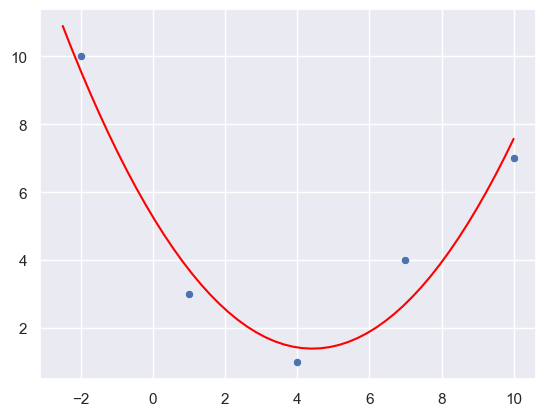

In [18]:
model_poly = LinearRegression(fit_intercept=False).fit(X_poly, y)

x_new = np.linspace(start=-2.5, stop=10, num=50) # 50 Stuetzstellen für Polynomkurve
X_new_poly = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x_new.reshape(-1, 1)) # Transformation analog zu Trainingsdaten

y_new = model_poly.predict(X_new_poly) # Funktionswerte des Polynoms berechnen

ax = sns.scatterplot(x=x, y=y)
sns.lineplot(ax=ax, x=x_new, y=y_new, color="red")
plt.show()
